### Simulating two different species (*E. coli* and *Strept. thermophilus*) competing for the same substrates using CMBpy

In [1]:
import matplotlib.pyplot as plt
from cbmpy.CBModel import Model
from dcFBA import DefaultModels
from dcFBA.DynamicModels import DynamicParallelFBA


pyparsing import
CBGLPK based on swiglpk: not all methods implimented yet! 5.0

*****
Using CPLEX
*****

doFBAMinSum not available with GLPK


***********************************************************************
* Welcome to CBMPy (0.8.8) - PySCeS Constraint Based Modelling        *
*       https://systemsbioinformatics.github.io/cbmpy/                *
* Copyright (C) Brett G. Olivier, 2014 - 2024                         *
* Systems Biology Lab, A-LIFE, AIMMS, Faculty of Science              *
* Vrije Universiteit Amsterdam, Amsterdam, The Netherlands            *
* This version of CBMPy distributed under the GNU GPL v 3.0 licence   *
***********************************************************************



In [53]:
model1_cbm: Model = DefaultModels.read_default_model("e_coli_core")
model2_cbm: Model = DefaultModels.read_default_model("strep_therm")

# Exchange reaction are not set correctly, here we fix this
for rid in model1_cbm.getReactionIds():
    if rid.startswith("R_EX"):
        reaction = model1_cbm.getReaction(rid)
        reaction.is_exchange = True

for rid in model2_cbm.getReactionIds():
    if rid.startswith("R_EX"):
        reaction = model2_cbm.getReaction(rid)
        reaction.is_exchange = True

# Give the two models different glucose uptake rates
model1_cbm.getReaction("R_GLCpts").setUpperBound(10)
model2_cbm.getReaction("R_GLCpts").setUpperBound(6)

# Restrict Lactose uptake
model2_cbm.getReaction("R_LCTSGALex").setLowerBound(0)
model2_cbm.getReaction("R_LCTSt6").setUpperBound(30)




FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.012
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.005

User defined contraint FBC version 2
SBML3 load time: 0.785

FBC version: 2
M.getNumReactions: 656
M.getNumSpecies: 632
FBC.getNumObjectives: 1
FBC.getNumParameters: 16
FBC.getNumGeneProducts: 476
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.024
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.023
Gene G_CH8_1395 is not part of a GPR association. Will create anyway!
Gene G_CH8_1397 is not part of a GPR association. Will create anyway!
Gene G_CH8_1733 is not part of a GPR association. Will create anyway!
Gene G_CH8_0614 is not part of a GPR association. Will create anyway!
Gene G_CH8_1722 is not pa

The ``DynamicParallelFBA`` class accepts a list of N models. In this example, we use two models as described before.

Next, we specify the initial concentrations of both models and the initial concentrations of the external species.
        

In [54]:
parallel_fba = DynamicParallelFBA(
    [model1_cbm, model2_cbm],
    [1.0, 1.0],
    {
        "M_glc__D_e": 100,
        "M_succ_e": 0,
        "M_glu__L_e": 0.0,
        "M_gln__L_e": 0.0,
        "M_lcts_e": 100,
    }
) 

getState1
Model clone time: 0.3587949275970459
getState1
Model clone time: 0.26247096061706543


To run the simulation, use the following code:

In [55]:
#Build DynamicParallelFBA model
parallel_fba.simulate(0.1)

User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.00459599494934082

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 16 rows and 16 columns.
Aggregator did 24 substitutions.
Reduced LP has 32 rows, 55 columns, and 217 nonzeros.
Presolve time = 0.03 sec. (0.11 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =          1000.000000
Solution available (status=optimal) type: 1
Solution available (status=optimal) type: 1
User defined contraint FBC version 2
User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.03836703300476074

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 266 rows and 206 columns.
Aggregator did 239 substitutions.
Reduced LP has 127 rows, 211 columns, and 1095 nonzeros.
Presol

CPLEX Error  1217: No solution exists.


CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0
model: iRZ476 had an infeasible solution


The ``simulate`` runs the dynamic analysis until no organism can grow or one of the solutions is infeasible. Again we store the intermediate results for biomasses, metabolites and fluxes in the model and can retrieve them once the simulation is done:

In [56]:
biomasses = parallel_fba.get_biomasses()
metabolites = parallel_fba.get_metabolites()
T = parallel_fba.get_time_points()
fluxes = parallel_fba.fluxes

We can visualize the results easily:

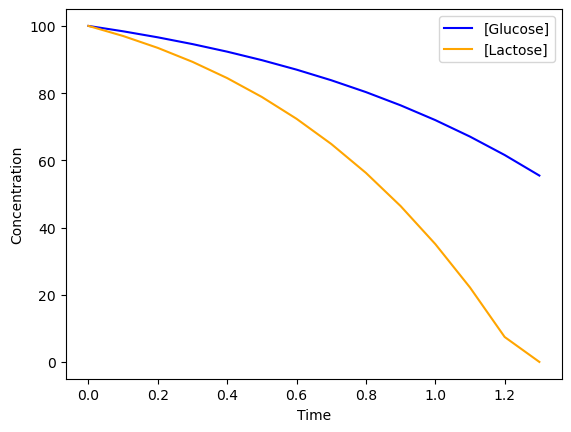

In [58]:
plt.plot(T, metabolites["M_glc__D_e"], color="blue", label="[Glucose]")
plt.plot(T, metabolites["M_lcts_e"], color="orange", label="[Lactose]")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()



Alternatively, we can plot the biomasses over time:

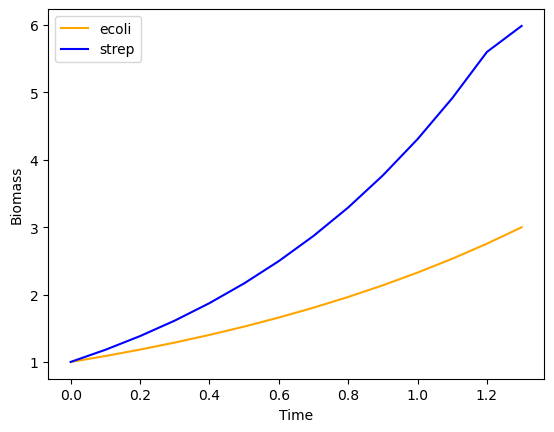

In [59]:
#Plot biomasses
plt.plot(T, biomasses[model1_cbm.getId()], color="orange", label="ecoli")
plt.plot(T, biomasses[model2_cbm.getId()], color="blue", label="strep")
plt.xlabel("Time")
plt.ylabel("Biomass")
plt.legend()
plt.show()


### Simulating two different species (*E. coli* and *Strept. thermophilus*) competing for the same substrates

In [11]:
import matplotlib.pyplot as plt
import cobra
from cobra.io import load_model,read_sbml_model


model1 = read_sbml_model("e_coli_core_BIGG.xml")
model2 = read_sbml_model("Strep_therm_aem.00780-22-s0001.xml")

Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-06


### MODEL 1: *E. coli* 

In [12]:
model1.exchanges

[<Reaction EX_ac_e at 0x1419499f0>,
 <Reaction EX_acald_e at 0x1413dbf40>,
 <Reaction EX_akg_e at 0x1413db4f0>,
 <Reaction EX_co2_e at 0x1413db490>,
 <Reaction EX_etoh_e at 0x1413da3b0>,
 <Reaction EX_for_e at 0x14194a740>,
 <Reaction EX_fru_e at 0x14194a860>,
 <Reaction EX_fum_e at 0x14194a980>,
 <Reaction EX_glc__D_e at 0x14194aaa0>,
 <Reaction EX_gln__L_e at 0x14194abc0>,
 <Reaction EX_glu__L_e at 0x14194ace0>,
 <Reaction EX_h_e at 0x14194ae00>,
 <Reaction EX_h2o_e at 0x14194af20>,
 <Reaction EX_lac__D_e at 0x14194b040>,
 <Reaction EX_mal__L_e at 0x14194b160>,
 <Reaction EX_nh4_e at 0x14194b280>,
 <Reaction EX_o2_e at 0x14194b3a0>,
 <Reaction EX_pi_e at 0x14194b4c0>,
 <Reaction EX_pyr_e at 0x14194b5e0>,
 <Reaction EX_succ_e at 0x14194b700>]

In [13]:
model1.demands

[]

In [14]:
model1.sinks

[]

In [15]:
model1.boundary

[<Reaction EX_ac_e at 0x1419499f0>,
 <Reaction EX_acald_e at 0x1413dbf40>,
 <Reaction EX_akg_e at 0x1413db4f0>,
 <Reaction EX_co2_e at 0x1413db490>,
 <Reaction EX_etoh_e at 0x1413da3b0>,
 <Reaction EX_for_e at 0x14194a740>,
 <Reaction EX_fru_e at 0x14194a860>,
 <Reaction EX_fum_e at 0x14194a980>,
 <Reaction EX_glc__D_e at 0x14194aaa0>,
 <Reaction EX_gln__L_e at 0x14194abc0>,
 <Reaction EX_glu__L_e at 0x14194ace0>,
 <Reaction EX_h_e at 0x14194ae00>,
 <Reaction EX_h2o_e at 0x14194af20>,
 <Reaction EX_lac__D_e at 0x14194b040>,
 <Reaction EX_mal__L_e at 0x14194b160>,
 <Reaction EX_nh4_e at 0x14194b280>,
 <Reaction EX_o2_e at 0x14194b3a0>,
 <Reaction EX_pi_e at 0x14194b4c0>,
 <Reaction EX_pyr_e at 0x14194b5e0>,
 <Reaction EX_succ_e at 0x14194b700>]

In [16]:
model1.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

In [17]:
from cobra.medium import minimal_medium
max_growth_1 = model1.slim_optimize()
minimal_medium(model1, max_growth_1)

EX_glc__D_e    10.000000
EX_nh4_e        4.765319
EX_o2_e        21.799493
EX_pi_e         3.214895
dtype: float64

In [18]:
minimal_medium(model1, 0.1, minimize_components=8)

EX_glc__D_e    10.00000
EX_nh4_e        0.54528
EX_pi_e         0.36787
dtype: float64

### MODEL 2: *Strept. thermophilus*

In [19]:
model2.exchanges

[<Reaction EX_ac_LPAREN_e_RPAREN_ at 0x141bdaec0>,
 <Reaction EX_ala_DASH_L_LPAREN_e_RPAREN_ at 0x141bdafb0>,
 <Reaction EX_arg_DASH_L_LPAREN_e_RPAREN_ at 0x141bdafe0>,
 <Reaction EX_asp_DASH_L_LPAREN_e_RPAREN_ at 0x141bdb0a0>,
 <Reaction EX_caspep_LPAREN_e_RPAREN_ at 0x141bdb160>,
 <Reaction EX_cit_LPAREN_e_RPAREN_ at 0x141bdb220>,
 <Reaction EX_co2_LPAREN_e_RPAREN_ at 0x141bdb2e0>,
 <Reaction EX_cys_DASH_L_LPAREN_e_RPAREN_ at 0x141bdb3a0>,
 <Reaction EX_dha_LPAREN_e_RPAREN_ at 0x141bdb460>,
 <Reaction EX_diact_LPAREN_e_RPAREN_ at 0x141bdb520>,
 <Reaction EX_etoh_LPAREN_e_RPAREN_ at 0x141bdb5e0>,
 <Reaction EX_fol_LPAREN_e_RPAREN_ at 0x141bdb6a0>,
 <Reaction EX_for_LPAREN_e_RPAREN_ at 0x141bdb760>,
 <Reaction EX_gal_LPAREN_e_RPAREN_ at 0x141bdb820>,
 <Reaction EX_gcald_LPAREN_e_RPAREN_ at 0x141bdb8e0>,
 <Reaction EX_glc_DASH_D_LPAREN_e_RPAREN_ at 0x141bdb9a0>,
 <Reaction EX_gln_DASH_L_LPAREN_e_RPAREN_ at 0x141bdba60>,
 <Reaction EX_glu_DASH_L_LPAREN_e_RPAREN_ at 0x141bdbb20>,
 <Reacti

In [20]:
model2.demands

[]

In [21]:
model2.sinks

[]

In [22]:
model2.boundary

[<Reaction EX_ac_LPAREN_e_RPAREN_ at 0x141bdaec0>,
 <Reaction EX_ala_DASH_L_LPAREN_e_RPAREN_ at 0x141bdafb0>,
 <Reaction EX_arg_DASH_L_LPAREN_e_RPAREN_ at 0x141bdafe0>,
 <Reaction EX_asp_DASH_L_LPAREN_e_RPAREN_ at 0x141bdb0a0>,
 <Reaction EX_caspep_LPAREN_e_RPAREN_ at 0x141bdb160>,
 <Reaction EX_cit_LPAREN_e_RPAREN_ at 0x141bdb220>,
 <Reaction EX_co2_LPAREN_e_RPAREN_ at 0x141bdb2e0>,
 <Reaction EX_cys_DASH_L_LPAREN_e_RPAREN_ at 0x141bdb3a0>,
 <Reaction EX_dha_LPAREN_e_RPAREN_ at 0x141bdb460>,
 <Reaction EX_diact_LPAREN_e_RPAREN_ at 0x141bdb520>,
 <Reaction EX_etoh_LPAREN_e_RPAREN_ at 0x141bdb5e0>,
 <Reaction EX_fol_LPAREN_e_RPAREN_ at 0x141bdb6a0>,
 <Reaction EX_for_LPAREN_e_RPAREN_ at 0x141bdb760>,
 <Reaction EX_gal_LPAREN_e_RPAREN_ at 0x141bdb820>,
 <Reaction EX_gcald_LPAREN_e_RPAREN_ at 0x141bdb8e0>,
 <Reaction EX_glc_DASH_D_LPAREN_e_RPAREN_ at 0x141bdb9a0>,
 <Reaction EX_gln_DASH_L_LPAREN_e_RPAREN_ at 0x141bdba60>,
 <Reaction EX_glu_DASH_L_LPAREN_e_RPAREN_ at 0x141bdbb20>,
 <Reacti

In [23]:
model2.medium

{'EX_ala_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_arg_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_asp_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_co2_LPAREN_e_RPAREN_': 1000.0,
 'EX_cys_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_gln_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_glu_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_gly_LPAREN_e_RPAREN_': 1000.0,
 'EX_h_LPAREN_e_RPAREN_': 1000.0,
 'EX_h2o_LPAREN_e_RPAREN_': 1000.0,
 'EX_his_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_ile_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_lcts_LPAREN_e_RPAREN_': 25.11,
 'EX_leu_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_lys_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_met_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_nac_LPAREN_e_RPAREN_': 1000.0,
 'EX_phe_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_pi_LPAREN_e_RPAREN_': 1000.0,
 'EX_pnto_DASH_R_LPAREN_e_RPAREN_': 1000.0,
 'EX_pro_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_pydam_LPAREN_e_RPAREN_': 1000.0,
 'EX_ribflv_LPAREN_e_RPAREN_': 1000.0,
 'EX_ser_DASH_L_LPAREN_e_RPAREN_': 1000.0,
 'EX_thm_LPAREN_e_RPAREN_': 

In [24]:
from cobra.medium import minimal_medium
max_growth_2 = model2.slim_optimize()
minimal_medium(model2, max_growth_2)

EX_ala_DASH_L_LPAREN_e_RPAREN_      0.645565
EX_arg_DASH_L_LPAREN_e_RPAREN_      0.052990
EX_asp_DASH_L_LPAREN_e_RPAREN_      0.246557
EX_cys_DASH_L_LPAREN_e_RPAREN_      0.014001
EX_gln_DASH_L_LPAREN_e_RPAREN_      0.394843
EX_gly_LPAREN_e_RPAREN_             0.048362
EX_h2o_LPAREN_e_RPAREN_            17.736912
EX_his_DASH_L_LPAREN_e_RPAREN_      0.039167
EX_ile_DASH_L_LPAREN_e_RPAREN_      0.082941
EX_lcts_LPAREN_e_RPAREN_           25.110000
EX_leu_DASH_L_LPAREN_e_RPAREN_      0.165882
EX_lys_DASH_L_LPAREN_e_RPAREN_      0.242842
EX_met_DASH_L_LPAREN_e_RPAREN_      0.034559
EX_nac_LPAREN_e_RPAREN_             0.001778
EX_phe_DASH_L_LPAREN_e_RPAREN_      0.071421
EX_pi_LPAREN_e_RPAREN_              0.839523
EX_pnto_DASH_R_LPAREN_e_RPAREN_     0.000178
EX_pro_DASH_L_LPAREN_e_RPAREN_      0.294901
EX_ribflv_LPAREN_e_RPAREN_          0.000010
EX_ser_DASH_L_LPAREN_e_RPAREN_      0.251528
EX_thm_LPAREN_e_RPAREN_             0.000010
EX_thr_DASH_L_LPAREN_e_RPAREN_      0.101372
EX_trp_DAS

In [25]:
minimal_medium(model2, 0.1, minimize_components=8)

,0,1
EX_asn_DASH_L_LPAREN_e_RPAREN_,2.714086e-01,0.000000e+00
EX_cys_DASH_L_LPAREN_e_RPAREN_,4.915200e-03,4.915200e-03
EX_gln_DASH_L_LPAREN_e_RPAREN_,0.000000e+00,2.714086e-01
EX_h2o_LPAREN_e_RPAREN_,1.700771e+01,1.641789e+01
EX_lcts_LPAREN_e_RPAREN_,2.511000e+01,2.511000e+01
EX_nac_LPAREN_e_RPAREN_,1.800000e-04,1.800000e-04
EX_pi_LPAREN_e_RPAREN_,8.497560e-02,8.497560e-02
EX_pnto_DASH_R_LPAREN_e_RPAREN_,1.800000e-05,1.800000e-05
EX_ribflv_LPAREN_e_RPAREN_,1.000000e-06,1.000000e-06
EX_thm_LPAREN_e_RPAREN_,1.000000e-06,1.000000e-06


***IMPORTANT***:

`model.medium` is just a copy of the current exchange fluxes. Assigning some value to it directly with, for exxample:

```Python
model.medium['EX_glc__D_e'] = 10
```
will not change the model. You have to assign an entire dictionary with the changed import flux upper bounds:

```Python
medium = model.medium
medium["EX_co2_e"] = 0.0
model.medium = medium

model.medium  # check the changes
```
Setting the growth medium also connects to the context manager, so you can set a specific growth medium in a reversible manner.

```Python
    medium = model.medium
    medium["EX_o2_e"] = 0.0
    model.medium = medium
    print(model.slim_optimize())
print(model.slim_optimize())
model.medium
```

### Set bounds for model 1 (*E. coli*)

In [26]:
model1

Name,e_coli_core
Memory address,1412bfd30
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [27]:
model1.optimize()

,fluxes,reduced_costs
PFK,7.477382,0.000000
PFL,0.000000,-0.015277
PGI,4.860861,0.000000
PGK,-16.023526,-0.000000
PGL,4.959985,0.000000
...,...,...
NADH16,38.534610,0.000000
NADTRHD,0.000000,-0.002546
NH4t,4.765319,0.000000
O2t,21.799493,0.000000


In [28]:
# E. coli glucose exchange reaction
model1.reactions.get_by_id("EX_glc__D_e")


Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x14194aaa0
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-10.0
Upper bound,1000.0


In [29]:
# E. coli glucose transporter
model1.reactions.get_by_id("GLCpts")

Reaction identifier,GLCpts
Name,D-glucose transport via PEP:Pyr PTS
Memory address,0x141979ff0
Stoichiometry,glc__D_e + pep_c --> g6p_c + pyr_c D-Glucose + Phosphoenolpyruvate --> D-Glucose 6-phosphate + Pyruvate
GPR,(b2417 and b1101 and b2415 and b2416) or (b1817 and b1818 and b1819 and b2415 and b2416) or...
Lower bound,0.0
Upper bound,1000.0


Set *upper bound* of the glucose transporter to *minus* the *lower bound* of the glucose exchange reaction.

In [30]:
model1.reactions.get_by_id("GLCpts").upper_bound = 10.
model1.reactions.get_by_id("GLCpts").lower_bound = 0.
model1.reactions.get_by_id("GLCpts")

Reaction identifier,GLCpts
Name,D-glucose transport via PEP:Pyr PTS
Memory address,0x141979ff0
Stoichiometry,glc__D_e + pep_c --> g6p_c + pyr_c D-Glucose + Phosphoenolpyruvate --> D-Glucose 6-phosphate + Pyruvate
GPR,(b2417 and b1101 and b2415 and b2416) or (b1817 and b1818 and b1819 and b2415 and b2416) or...
Lower bound,0.0
Upper bound,10.0


In [31]:
# E. coli glucose reactions
print(model1.reactions.get_by_id("EX_glc__D_e").bounds)
print(model1.reactions.get_by_id("GLCpts").bounds)

(-10.0, 1000.0)
(0.0, 10.0)


In [32]:
model1.optimize()

,fluxes,reduced_costs
PFK,7.477382,4.336809e-19
PFL,0.000000,-1.527746e-02
PGI,4.860861,0.000000e+00
PGK,-16.023526,-0.000000e+00
PGL,4.959985,0.000000e+00
...,...,...
NADH16,38.534610,0.000000e+00
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,0.000000e+00
O2t,21.799493,0.000000e+00


### Set bounds for model 2 (Strept. thermophilus)

In [33]:
model2

Name,iRZ476
Memory address,1381d73d0
Number of metabolites,632
Number of reactions,656
Number of genes,476
Number of groups,0
Objective expression,1.0*biomass_STR - 1.0*biomass_STR_reverse_5425b
Compartments,"Extracellular, Cytoplasm"


In [34]:
model2.optimize()

,fluxes,reduced_costs
MANpts,0.000000,0.000000e+00
PGGT2,0.122971,0.000000e+00
AIRC,0.041851,0.000000e+00
Kt2,0.000000,-0.000000e+00
MOADCST,0.000000,-1.387779e-17
...,...,...
EX_sucr_LPAREN_e_RPAREN_,0.000000,-4.916346e-01
FFSD,0.000000,0.000000e+00
CASP,0.000000,0.000000e+00
EX_caspepm_LPAREN_e_RPAREN_,0.000000,-3.897960e-01


In [35]:
# Strept. thermophilus glucose and lactose exchange reactions and transporters
print(model2.reactions.get_by_id("EX_glc_DASH_D_LPAREN_e_RPAREN_").bounds)
print(model2.reactions.get_by_id("GLCpts").bounds)
print(model2.reactions.get_by_id("EX_lcts_LPAREN_e_RPAREN_").bounds)
print(model2.reactions.get_by_id("LCTSt6").bounds)

(2.54, 2.54)
(0.0, 0.0)
(-25.11, -25.11)
(1.07, 1.07)


In [36]:
# Strept. thermophilus glucose exchange reaction
model2.reactions.get_by_id("EX_glc_DASH_D_LPAREN_e_RPAREN_").lower_bound = -6.
model2.reactions.get_by_id("EX_glc_DASH_D_LPAREN_e_RPAREN_").upper_bound = 1000.
model2.reactions.get_by_id("EX_glc_DASH_D_LPAREN_e_RPAREN_")

Reaction identifier,EX_glc_DASH_D_LPAREN_e_RPAREN_
Name,D-Glucose exchange
Memory address,0x141bdb9a0
Stoichiometry,glc_DASH_D_e <=> D_Glucose_ <=>
GPR,
Lower bound,-6.0
Upper bound,1000.0


In [37]:
# Strept. thermophilus glucose transport reaction
model2.reactions.get_by_id("GLCpts").bounds = (0.0, 6.0)
model2.reactions.get_by_id("GLCpts")

Reaction identifier,GLCpts
Name,D-glucose transport via PEP:Pyr PTS
Memory address,0x1419d7be0
Stoichiometry,glc_DASH_D_e + pep_c --> g6p_c + pyr_c D_Glucose_ + Phosphoenolpyruvate_ --> D_Glucose_6_phosphate_ + Pyruvate_
GPR,CH8_1345 and CH8_1344 and CH8_0370 and CH8_0371 and CH8_0372
Lower bound,0.0
Upper bound,6.0


In [38]:
# Strept. thermophilus lactose exchange reaction
model2.reactions.get_by_id("EX_lcts_LPAREN_e_RPAREN_").lower_bound = -30.0
model2.reactions.get_by_id("EX_lcts_LPAREN_e_RPAREN_").upper_bound = 1000.0
model2.reactions.get_by_id("EX_lcts_LPAREN_e_RPAREN_")

Reaction identifier,EX_lcts_LPAREN_e_RPAREN_
Name,Lactose exchange
Memory address,0x141bd8ca0
Stoichiometry,lcts_e <=> Lactose_ <=>
GPR,
Lower bound,-30.0
Upper bound,1000.0


Set the upper bound of lactose transport reaction to *minus* the lower bound of the exchange reaction

In [39]:
# Strept. thermophilus lactose transport reaction
model2.reactions.get_by_id("LCTSt6").bounds = (0.0,30.0)
model2.reactions.get_by_id("LCTSt6")

Reaction identifier,LCTSt6
Name,lactose transport inout via proton symport
Memory address,0x141b67b80
Stoichiometry,h_e + lcts_e --> h_c + lcts_c H_ + Lactose_ --> H_ + Lactose_
GPR,CH8_1487
Lower bound,0.0
Upper bound,30.0


Block lactose/galactose antiporter

In [40]:
model2.reactions.LCTSGALex

Reaction identifier,LCTSGALex
Name,lactose-galactose exchange
Memory address,0x141c07b20
Stoichiometry,gal_e + lcts_c <=> gal_c + lcts_e D_Galactose_ + Lactose_ <=> D_Galactose_ + Lactose_
GPR,CH8_1487
Lower bound,-1000.0
Upper bound,1000.0


In [41]:
model2.reactions.LCTSGALex.lower_bound = -30.0
model2.reactions.LCTSGALex.upper_bound = 1000.0

In [42]:
# Strept. thermophilus glucose and lactose exchange and transport reactions
print(model2.reactions.get_by_id("EX_glc_DASH_D_LPAREN_e_RPAREN_").bounds)
print(model2.reactions.get_by_id("GLCpts").bounds)
print(model2.reactions.get_by_id("EX_lcts_LPAREN_e_RPAREN_").bounds)
print(model2.reactions.get_by_id("LCTSt6").bounds)
print(model2.reactions.get_by_id("LCTSGALex").bounds)

(-6.0, 1000.0)
(0.0, 6.0)
(-30.0, 1000.0)
(0.0, 30.0)
(-30.0, 1000.0)


In [43]:
model2.optimize()

,fluxes,reduced_costs
MANpts,0.00000,-5.204170e-18
PGGT2,0.17607,0.000000e+00
AIRC,0.00000,3.469447e-18
Kt2,0.00000,-0.000000e+00
MOADCST,0.00000,-3.469447e-18
...,...,...
EX_sucr_LPAREN_e_RPAREN_,0.00000,-1.003795e-01
FFSD,0.00000,0.000000e+00
CASP,0.00000,-6.071532e-18
EX_caspepm_LPAREN_e_RPAREN_,0.00000,-2.091240e+00


### Dynamic setup for model 1 (E. coli)

In [73]:
def add_dynamic_bounds_1(model, y):
    """Use external concentrations to bound the uptake flux of glucose."""
    biomass, glucose = y  # expand the boundary species
    glucose_bounds = (-10.0 * glucose / (5 + glucose),
                     1000.0)
    model.reactions.EX_glc__D_e.bounds = glucose_bounds
    

def dynamic_system_1(t, y):
    """Calculate the time derivative of external species."""

    global feasibility_1

    biomass, glucose = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    fluxes = np.zeros(2)
    with model:
        add_dynamic_bounds_1(model, y)
        
        model.slim_optimize()

        if not model.solver.status == 'infeasible':
            all_fluxes = model.optimize()
            feasibility_1 = -1.0

            for i,obj in enumerate(['BIOMASS_Ecoli_core_w_GAM', 'EX_glc__D_e']):                
                fluxes[i] = all_fluxes.fluxes.get(obj)
            
            # Since the calculated fluxes are specific rates, we multiply them by the
            # biomass concentration to get the bulk exchange rates.
            fluxes *= biomass

        else:
            feasibility_1 = 0.0      

    return fluxes

def infeasible_event_1(t, y):
    return feasibility_1

infeasible_event_1.direction = 1
infeasible_event_1.terminal = True

### Dynamic setup for model 2 (Streptococcus thermophilus)

In [45]:
model2.exchanges.EX_succ_LPAREN_e_RPAREN_.bounds = (0.0,30.0)
model2.exchanges.EX_glu_DASH_L_LPAREN_e_RPAREN_.bounds = (0.0,30.0)
model2.exchanges.EX_gln_DASH_L_LPAREN_e_RPAREN_.bounds = (0.0,30.0)

print(model2.exchanges.EX_succ_LPAREN_e_RPAREN_.bounds)
print(model2.exchanges.EX_glu_DASH_L_LPAREN_e_RPAREN_.bounds)
print(model2.exchanges.EX_gln_DASH_L_LPAREN_e_RPAREN_.bounds)
print(model2.exchanges.EX_lcts_LPAREN_e_RPAREN_.bounds)
print(model2.exchanges.EX_gal_LPAREN_e_RPAREN_.bounds)

(0.0, 30.0)
(0.0, 30.0)
(0.0, 30.0)
(-30.0, 1000.0)
(24.04, 24.04)


In [46]:
model2.optimize()

,fluxes,reduced_costs
MANpts,0.000000,-1.734723e-18
PGGT2,0.174515,0.000000e+00
AIRC,0.000000,-3.469447e-18
Kt2,0.000000,-0.000000e+00
MOADCST,0.000000,3.469447e-18
...,...,...
EX_sucr_LPAREN_e_RPAREN_,0.000000,-9.949292e-02
FFSD,0.000000,0.000000e+00
CASP,0.000000,0.000000e+00
EX_caspepm_LPAREN_e_RPAREN_,0.000000,-6.599697e+00


In [74]:
def add_dynamic_bounds_2(model, y):
    """Use external concentrations to bound the uptake flux of glucose and lactose."""
    biomass, glucose, succinate, glutamate, glutamine, lactose = y  # expand the boundary species

    glucose_bounds = (-6.0 * glucose / (5.0 + glucose),
                     1000.0)    
    model.reactions.EX_glc_DASH_D_LPAREN_e_RPAREN_.bounds = glucose_bounds

    lactose_bounds = (-30.0 * lactose / (0.10 + lactose),
                     1000.0)
    model.reactions.EX_lcts_LPAREN_e_RPAREN_.bounds = lactose_bounds

    succinate_bounds = (0.0,30.0 * succinate / (1.0 + succinate))    
    model.reactions.EX_succ_LPAREN_e_RPAREN_.bounds = succinate_bounds

    glutamate_bounds = (0.0,30.0 * glutamate / (1.0 + glutamate))    
    model.reactions.EX_glu_DASH_L_LPAREN_e_RPAREN_.bounds = glutamate_bounds

    glutamine_bounds = (0.0,30.0 * glutamine / (1.0 + glutamine))    
    model.reactions.EX_gln_DASH_L_LPAREN_e_RPAREN_.bounds = glutamine_bounds

def dynamic_system_2(t, y):
    """Calculate the time derivative of external species."""

    global feasibility_2

    biomass, glucose, succinate, glutamate, glutamine, lactose = y  # expand the boundary species
    
    fluxes = np.zeros(6)
    with model:
        add_dynamic_bounds_2(model, y)
        
        model.slim_optimize()

        if not model.solver.status == 'infeasible':
            all_fluxes = model.optimize()
            feasibility_2 = -1.0

            for i,obj in enumerate(['biomass_STR', 'EX_glc_DASH_D_LPAREN_e_RPAREN_', 
                                    'EX_succ_LPAREN_e_RPAREN_', 'EX_glu_DASH_L_LPAREN_e_RPAREN_',
                                    'EX_gln_DASH_L_LPAREN_e_RPAREN_','EX_lcts_LPAREN_e_RPAREN_']):                
                fluxes[i] = all_fluxes.fluxes.get(obj)
            
            # Since the calculated fluxes are specific rates, we multiply them by the
            # biomass concentration to get the bulk exchange rates.
            fluxes *= biomass

        else:
            feasibility_2 = 0.0      

    return fluxes    


def infeasible_event_2(t, y):
    return feasibility_2

infeasible_event_2.direction = 1
infeasible_event_2.terminal = True


#### Initialize tensorboard

In [48]:
# ! pip install tensorboard
from torch.utils.tensorboard import SummaryWriter
tbwriter = SummaryWriter('logs/init3_writer')

2025-09-01 07:18:31.997973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Launch a Tensorboard session. The session will populate after model training starts.

To display the TensorBoard application, you need to start the TensorBoard server and then open the TensorBoard interface in your web browser. Here are the steps:

##### 1. Start the TensorBoard Server

Open a terminal, **activate the conda environment** in which your notebook is running, and navigate to the directory where your logs folder is stored. If your logs are stored in the `logs` directory, you can start TensorBoard with the following command:

```sh
tensorboard --logdir=logs
```

After starting the TensorBoard server, you will see an output similar to this:

```
TensorBoard 2.x.x at http://localhost:6006/ (Press CTRL+C to quit)
```

Open your web browser and go to the URL provided, typically `http://localhost:6006/`.

This will display the TensorBoard interface where you can visualize your logs and other metrics. This is by far the most reliable method to start a Tensorboard session.

You can also display http://localhost:6006/ directly inside VS code by launching the built-in browser (Cmd+Shift+P and then select "Simple Browser").

##### 2. Open TensorBoard in a notebook cell
Alternatively, you can start the session in a cell with the syntax shown below, and then go to http://localhost:6006/, or go back to the cell output during the run execution. Another alternative is to activate the cell in a different jupyter notebook, and then periodically check the status of training in that notebook.

```python
%load_ext tensorboard
%tensorboard --logdir logs
```

However, using this method, it may be difficult to terminate the session, and/or restart a new one without restarting VS code.


In [ ]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp

# Prepare the initial conditions for the two models.
niter = 400

mass_global = np.zeros((2,niter+1))
glucose_global = np.zeros(niter+1)
succinate_global = np.zeros(niter+1)
glutamate_global = np.zeros(niter+1)
glutamine_global = np.zeros(niter+1)
lactose_global = np.zeros(niter+1)

sol1_global = np.zeros((2,niter+1))
sol2_global = np.zeros((6,niter+1))
sol_status_global = np.zeros((2,niter+1))

# Initial conditions
y0_1_mass = 1.0
y0_2_mass = 1.0
y0_glucose = 100.0
y0_succinate = 0.0
y0_glutamate = 0.0
y0_glutamine = 0.0
y0_lactose = 100.0

y0_1 = [y0_1_mass, y0_glucose] # Initial conditions for biomass, glucose
y0_2 = [y0_2_mass, y0_glucose, y0_succinate, y0_glutamate, y0_glutamine, y0_lactose] # Initial conditions for biomass, glucose, lactose

# Initialize global solutions with initial conditions
sol1_global[:, 0] = y0_1  # Initial conditions for biomass, glucose and acetate in model1
sol2_global[:, 0] = y0_2  # Initial conditions for biomass, glucose and acetate in model2
sol_status_global[:, 0] = [0, 0]  # Initial status: 0 means successful integration, 1 means event triggered

# Initialize global concentrations with initial conditions for each concentration calculated explicitly
mass_global[:, 0] = [y0_1_mass, y0_2_mass]
glucose_global[0] = y0_glucose
succinate_global[0] = y0_succinate
glutamate_global[0] = y0_glutamate
glutamine_global[0] = y0_glutamine
lactose_global[0] = y0_lactose

# Initialize tensortboard logs for time 0
with tbwriter as writer:
    writer.add_scalar('mass_model_1', y0_1_mass, 0)
    writer.add_scalar('mass_model_2', y0_2_mass, 0)
    writer.add_scalar('glucose', y0_glucose, 0)
    writer.add_scalar('succinate', y0_succinate, 0)
    writer.add_scalar('glutamate', y0_glutamate, 0)
    writer.add_scalar('glutamine', y0_glutamine, 0)
    writer.add_scalar('lactose', y0_lactose, 0)

t_global = [0]
delta_t = 0.01

# IMPORTANT: Under certain kinetic parameters concentrations 
# may become negative, because the combined consumption 
# of a metabolite by all the species that are using it
# during the timestep may exceed its availability. 
# In this case it is necessary to use a smaller timestep.

for iter in tqdm(range(niter)):
    
    ts = np.linspace(0, delta_t, 2)  # Desired integration resolution and interval

    if iter>0 and sol_status_global[0, iter-1] == 1:
        pass
    else:

        with model1 as model:

            sol1 = solve_ivp(
                fun=dynamic_system_1,
                events=[infeasible_event_1],
                t_span=(ts.min(), ts.max()),
                y0=y0_1,
                t_eval=ts,
                rtol=1e-3,
                atol=1e-6,        
                method='RK45'
            )


    if iter>0 and sol_status_global[1, iter-1] == 1:
        pass
    else:

        with model2 as model:

            sol2 = solve_ivp(
                fun=dynamic_system_2,
                events=[infeasible_event_2],
                t_span=(ts.min(), ts.max()),
                y0=y0_2,
                t_eval=ts,
                rtol=1e-3,
                atol=1e-6,
                method='RK45'
            )

    # Store the time points
    t_global.append(t_global[-1] + delta_t)
    
    # Store the individual solutions in the global solutions
    sol1_global[:, iter+1] = sol1['y'][:, -1]
    sol2_global[:, iter+1] = sol2['y'][:, -1]
    sol_status_global[:, iter+1] = sol1['status'], sol2['status']

    # Update the masses
    y0_1_mass = sol1['y'][0, -1]
    y0_2_mass = sol2['y'][0, -1]

    # Update the glucose concentration subtracting from the initial value
    # the sum of both strains updates 
    d1_glucose = sol1['y'][1,0]-sol1['y'][1,-1]
    d2_glucose = sol2['y'][1,0]-sol2['y'][1,-1] 
    y0_glucose = y0_glucose - d1_glucose - d2_glucose
    y0_succinate = sol2['y'][2, -1]
    y0_glutamate = sol2['y'][3, -1]
    y0_glutamine = sol2['y'][4, -1]
    y0_lactose = sol2['y'][5, -1]

    # Update the initial conditions for both strains
    y0_1 = [y0_1_mass, y0_glucose]
    y0_2 = [y0_2_mass, y0_glucose, y0_succinate, y0_glutamate, y0_glutamine, y0_lactose]

    # Store the results in the global solutions
    mass_global[:, iter+1] = [y0_1_mass, y0_2_mass]
    glucose_global[iter+1] = y0_glucose
    succinate_global[iter+1] = y0_succinate
    glutamate_global[iter+1] = y0_glutamate
    glutamine_global[iter+1] = y0_glutamine
    lactose_global[iter+1] = y0_lactose
    

    # Save logs for tensorboard
    # with writer as tbwriter:
    tbwriter.add_scalar('mass_model_1', y0_1_mass, iter+1)
    tbwriter.add_scalar('mass_model_2', y0_2_mass, iter+1)
    tbwriter.add_scalar('glucose', y0_glucose, iter+1)
    tbwriter.add_scalar('succinate', y0_succinate, iter+1)
    tbwriter.add_scalar('glutamate', y0_glutamate, iter+1)
    tbwriter.add_scalar('glutamine', y0_glutamine, iter+1)
    tbwriter.add_scalar('lactose', y0_lactose, iter+1)

    if sol1['status'] == 1 and sol2['status'] == 1:
        print(f"Both solutions are infeasible")
        break

    # Break tolerance on masses in the last 5 time points
    n_t = len(t_global)
    if n_t > 5 and np.max(np.abs(np.diff(mass_global[:, n_t-5:n_t], axis=1))) < 1e-3:
        print(f"Mass balance converged")
        break



 72%|███████▏  | 287/400 [00:25<00:10, 11.17it/s]

Both solutions are infeasible


#### Plot timelines of biomass and glucose

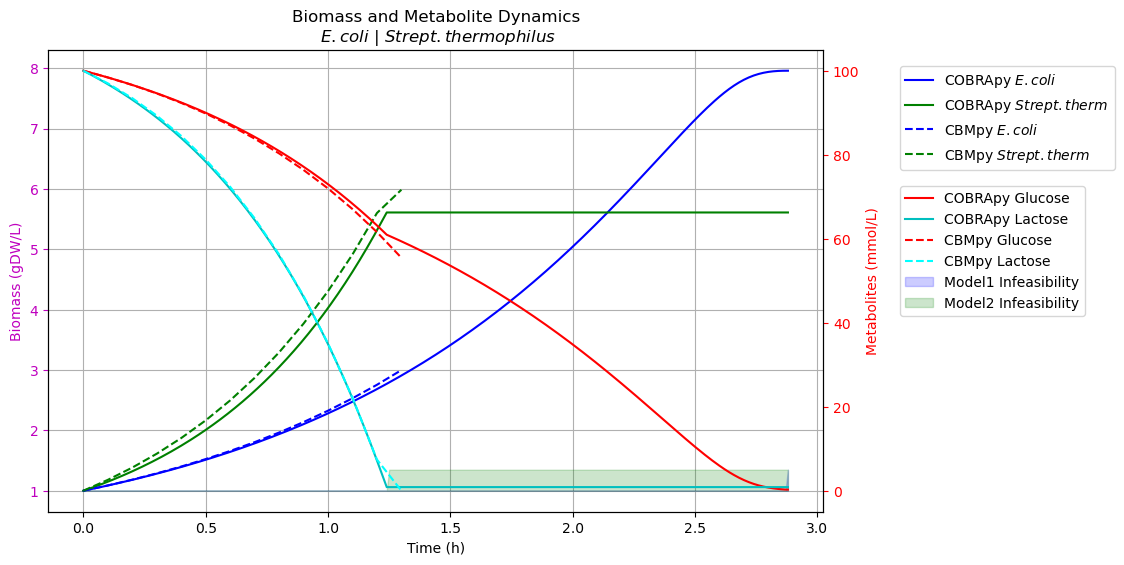

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline 

# t = np.linspace(0, niter * 0.015, niter + 1)
n_t = len(t_global)
t = t_global

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.tick_params(axis='y', colors='m')
ax.plot(t, mass_global[0][:n_t], label='COBRApy $E. coli$ ', color='b')
ax.plot(t, mass_global[1][:n_t], label='COBRApy $Strept. therm$ ', color='g')
# add CBMpy result
ax.plot(T, biomasses[model1_cbm.getId()], color="blue", linestyle='--', label="CBMpy $E. coli$")
ax.plot(T, biomasses[model2_cbm.getId()], color="green", linestyle='--', label="CBMpy $Strept. therm$")
ax2 = plt.twinx(ax)
ax2.tick_params(axis='y', colors='r')
ax2.plot(t, glucose_global[:n_t], color='r', label='COBRApy Glucose')
# ax2.plot(t, succinate_global[:n_t], color='y', label='COBRApy Succinate', linestyle='--')
# ax2.plot(t, glutamate_global[:n_t], color='orange', label='COBRApy Glutamate', linestyle='--')
# ax2.plot(t, glutamine_global[:n_t], color='purple', label='COBRApy Glutamine', linestyle='--')
ax2.plot(t, lactose_global[:n_t], color='c', label='COBRApy Lactose', linestyle='-')
# add CBMpy result
ax2.plot(T, metabolites["M_glc__D_e"], color="red", linestyle='--', label="CBMpy Glucose")
ax2.plot(T, metabolites["M_lcts_e"], color="cyan", linestyle='--', label="CBMpy Lactose")

# plot on secondary y-axis the status of both models as colored bars going from 0 to the value of the status

ax2.fill_between(t, 0, 5*sol_status_global[0][:n_t], color='b', alpha=0.2, label='Model1 Infeasibility')
ax2.fill_between(t, 0, 5*sol_status_global[1][:n_t], color='g', alpha=0.2, label='Model2 Infeasibility')

ax.set_ylabel('Biomass (gDW/L)', color='m')
ax.set_xlabel('Time (h)', color='k')
ax2.set_ylabel('Metabolites (mmol/L)', color='r')

ax.grid()

# Add a title in two lines. In the second line specifiy mutant 1 is respiratory deficient, and mutant 2 cannot uptake glucose
ax.title.set_text("Biomass and Metabolite Dynamics\n $E. coli$ | $Strept. thermophilus$")

# Place legends outside the figure frame on the top right
ax.legend(bbox_to_anchor=(1.09, 0.98), loc='upper left')
ax2.legend(bbox_to_anchor=(1.09, 0.72), loc='upper left')

plt.show()